<a href="https://colab.research.google.com/github/Baasty-OCh/Miner-a-curso-/blob/Labs/ProyectoMineriaBO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hito 1

# **1. Introducción (problema y motivación)**
**Motivación** \\
El conjunto de datos que se va a estudiar contiene información relacionada con las calificaciones de estudiantes en una materia específica, con variables como la asistencia, tareas, proyectos, exámenes y participación. Contiene 5000 registros de estudiantes de un proveedor privado, es muy útil para hacer proyectos de clasificación donde el objetivo principal es predecir la clasificación final de un estudiante. \\
Es interesante analizar los datos para poder predecir el rendimiento academico y así hacer optimizaciones en el método de enseñanza.

# **2. Exploración de datos (estadísticas, patrones iniciales)**

In [ ]:
import kagglehub
import pandas as pd
import os

# Download latest version
path = kagglehub.dataset_download("mahmoudelhemaly/students-grading-dataset")

# Guardamos la ruta
csv = os.path.join(path, 'Students_Grading_Dataset.csv')

# Cargamos el csv con pd
df = pd.read_csv(csv)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  5000 non-null   object 
 1   First_Name                  5000 non-null   object 
 2   Last_Name                   5000 non-null   object 
 3   Email                       5000 non-null   object 
 4   Gender                      5000 non-null   object 
 5   Age                         5000 non-null   int64  
 6   Department                  5000 non-null   object 
 7   Attendance (%)              5000 non-null   float64
 8   Midterm_Score               5000 non-null   float64
 9   Final_Score                 5000 non-null   float64
 10  Assignments_Avg             5000 non-null   float64
 11  Quizzes_Avg                 5000 non-null   float64
 12  Participation_Score         5000 non-null   float64
 13  Projects_Score              5000 

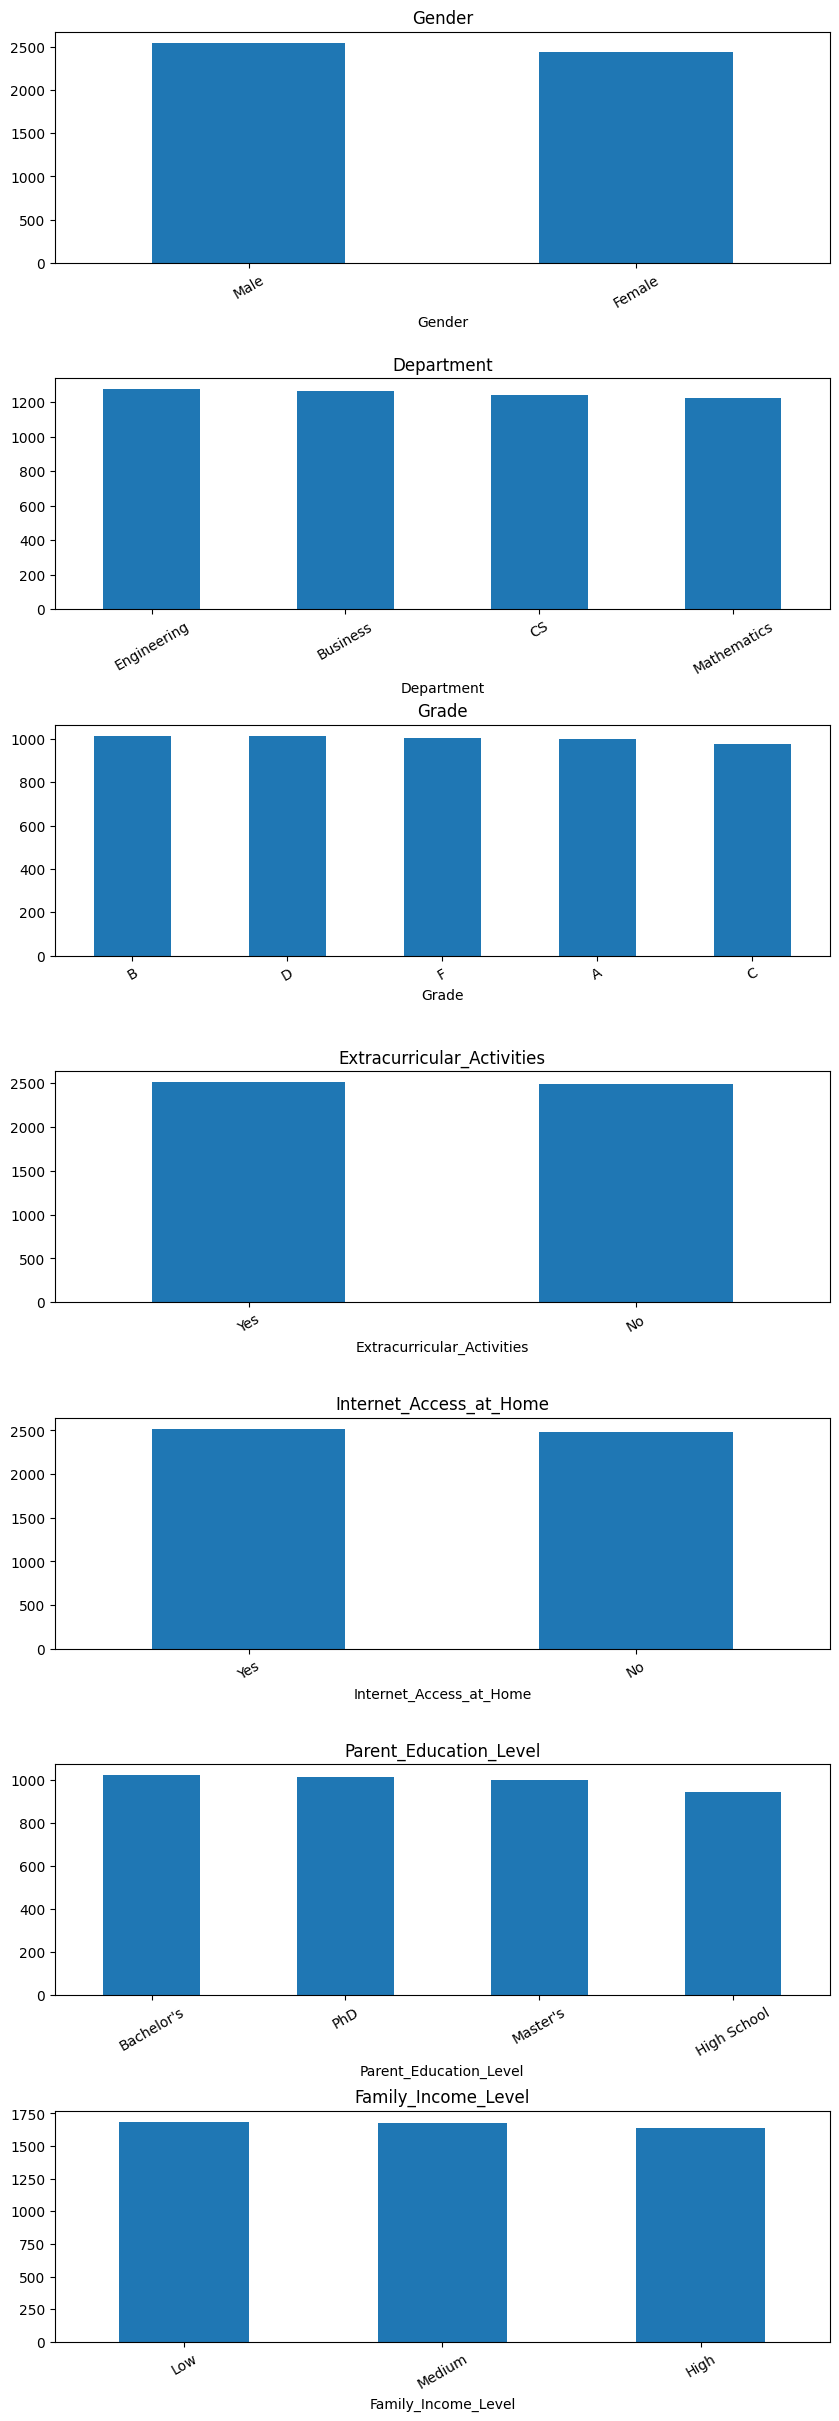

In [ ]:
# Seleccionar columnas categóricas (excluyendo nombre, correo, ID)
categories = [
    'Gender', 'Department', 'Grade', 'Extracurricular_Activities',
    'Internet_Access_at_Home', 'Parent_Education_Level', 'Family_Income_Level'
]

# Crear figura y ejes
fig, ax = plt.subplots(nrows=len(categories), ncols=1, figsize=(10, 30))
fig.subplots_adjust(hspace=0.5)

# Graficar barras por categoría
for i, col in enumerate(categories):
    df[col].value_counts().plot(kind='bar', ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)

plt.show()

In [ ]:
# Algunos datos importantes del dataset

shape = df.shape
print(f"El dataset tiene {shape[0]} filas y {shape[1]} columnas")

El dataset tiene 5000 filas y 23 columnas


In [ ]:
df.describe(include='all')

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
count,5000,5000,5000,5000,5000,5000.000000,5000,5000.000000,5000.000000,5000.000000,...,5000.00000,5000.000000,5000,5000.000000,5000,5000,3975,5000,5000.000000,5000.000000
unique,5000,8,6,5000,2,NaN,4,NaN,NaN,NaN,...,NaN,NaN,5,NaN,2,2,4,3,NaN,NaN
top,S5999,Maria,Johnson,student4999@university.com,Male,NaN,Engineering,NaN,NaN,NaN,...,NaN,NaN,B,NaN,Yes,Yes,Bachelor's,Low,NaN,NaN
freq,1,657,868,1,2551,NaN,1274,NaN,NaN,NaN,...,NaN,NaN,1014,NaN,2512,2520,1020,1687,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,21.048400,NaN,75.356076,70.701924,69.546552,...,74.78305,75.021860,NaN,17.521140,NaN,NaN,NaN,NaN,5.507200,6.514420
std,NaN,NaN,NaN,NaN,NaN,1.989786,NaN,14.392716,17.436325,17.108996,...,14.54243,14.323246,NaN,7.193035,NaN,NaN,NaN,NaN,2.886662,1.446155
min,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,50.010000,40.000000,40.010000,...,50.00000,50.010000,NaN,5.000000,NaN,NaN,NaN,NaN,1.000000,4.000000
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,62.945000,55.707500,54.697500,...,61.97000,62.710000,NaN,11.500000,NaN,NaN,NaN,NaN,3.000000,5.300000
50%,NaN,NaN,NaN,NaN,NaN,21.000000,NaN,75.670000,70.860000,69.485000,...,74.54000,75.345000,NaN,17.400000,NaN,NaN,NaN,NaN,6.000000,6.500000
75%,NaN,NaN,NaN,NaN,NaN,23.000000,NaN,87.862500,85.760000,83.922500,...,87.63000,87.060000,NaN,23.700000,NaN,NaN,NaN,NaN,8.000000,7.800000


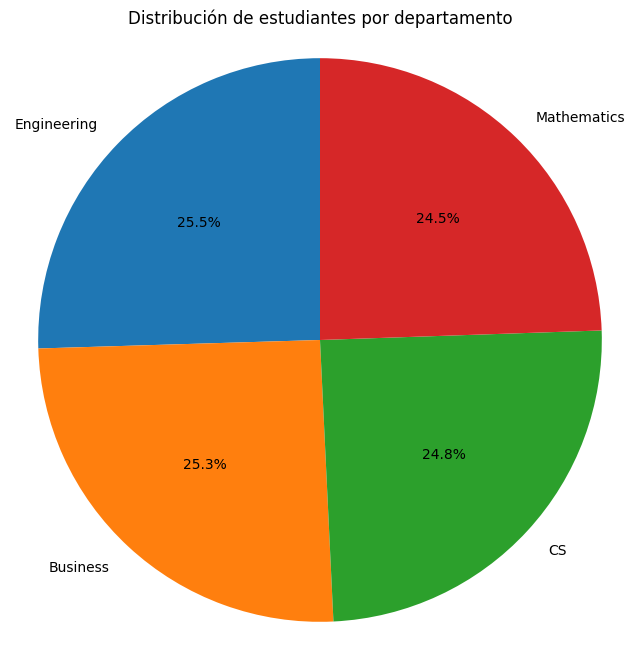

In [ ]:
import matplotlib.pyplot as plt

department_counts = df['Department'].value_counts()

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de estudiantes por departamento')
plt.axis('equal')
plt.show()


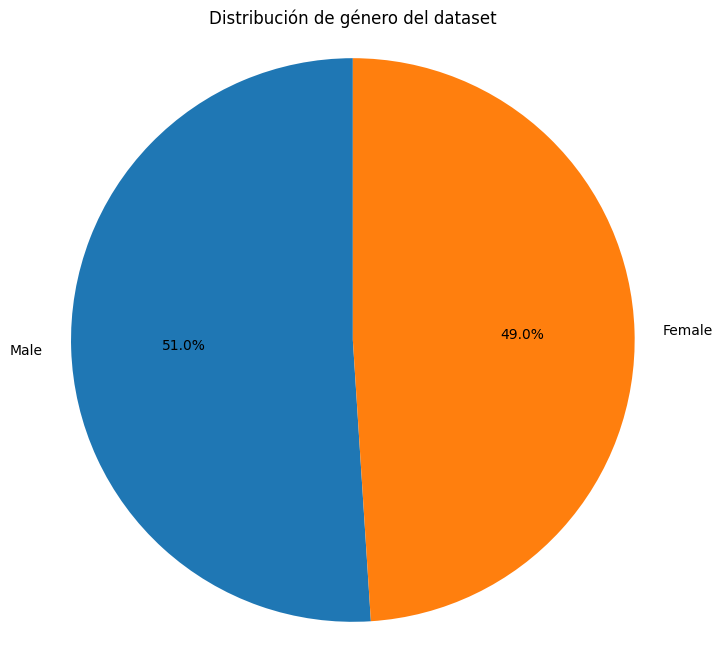

In [ ]:
import matplotlib.pyplot as plt

Gender_counts = df['Gender'].value_counts()

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(Gender_counts, labels=Gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de género del dataset')
plt.axis('equal')
plt.show()


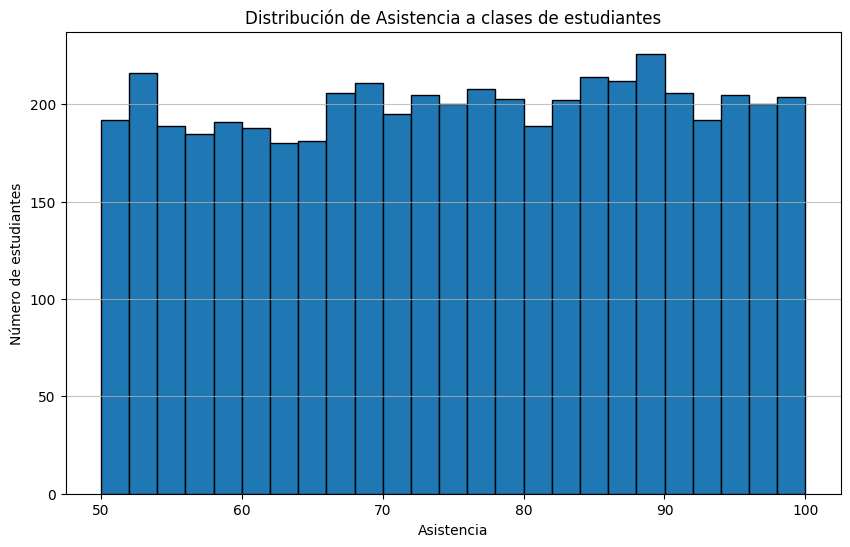

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.hist(df['Attendance (%)'], bins=25, edgecolor='black')
plt.xlabel('Asistencia')
plt.ylabel('Número de estudiantes')
plt.title('Distribución de Asistencia a clases de estudiantes')
plt.grid(axis='y', alpha=0.75)
plt.show()


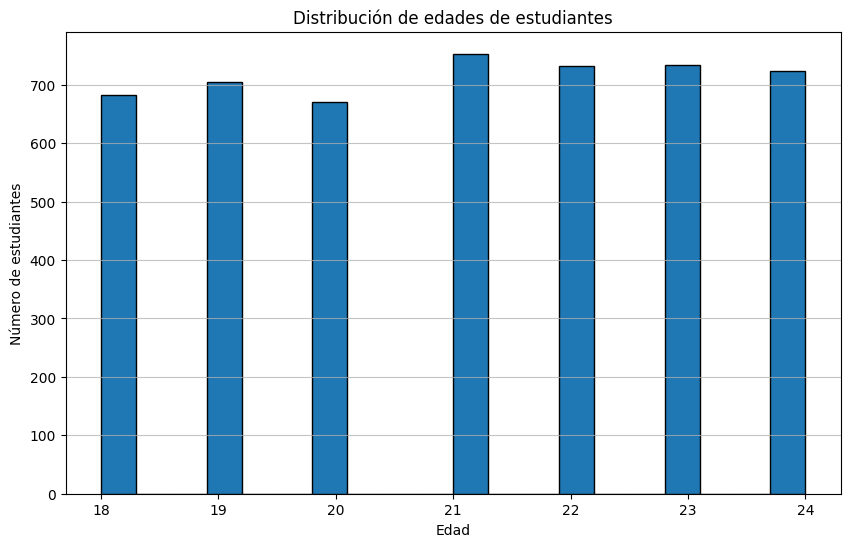

In [ ]:
# prompt: Gráfico de edad

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=20, edgecolor='black')  # Ajusta el número de bins según sea necesario
plt.xlabel('Edad')
plt.ylabel('Número de estudiantes')
plt.title('Distribución de edades de estudiantes')
plt.grid(axis='y', alpha=0.75)
plt.show()


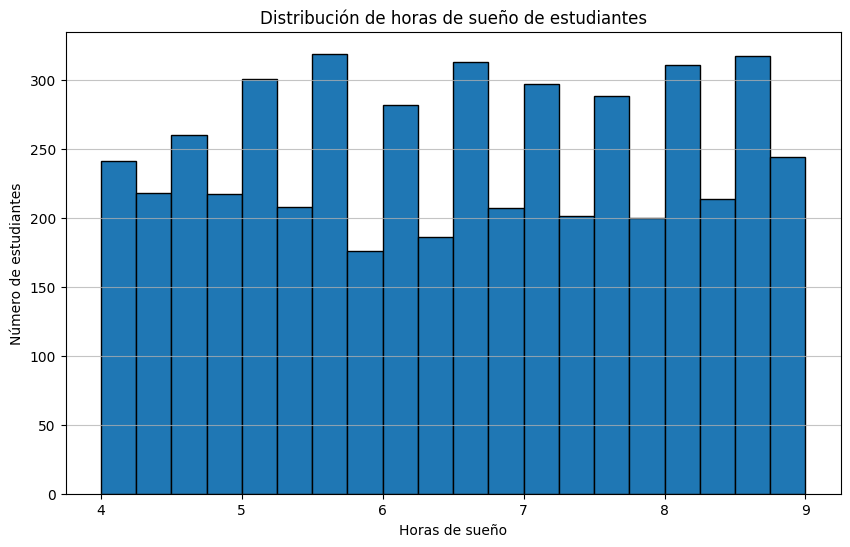

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(df['Sleep_Hours_per_Night'], bins=20, edgecolor='black')
plt.xlabel('Horas de sueño')
plt.ylabel('Número de estudiantes')
plt.title('Distribución de horas de sueño de estudiantes')
plt.grid(axis='y', alpha=0.75)
plt.show()


# **3. Preguntas y problemas (formulación de preguntas y posibles hipótesis)**

# **4. Propuesta experimental (estrategia metodológica)**

# **5. Experimento preliminar (implementación y análisis de resultados)**